In [55]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
!pip install pybbn
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
data = pd.read_csv("/content/weatherAUS.csv")

In [57]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [58]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## **Question 2.2:**

In [59]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Create bands for variables that we want to use in the model
df['Temp9amcat']=df['Temp9am'].apply(lambda x: 'cat1'   if x<15 else
                                                            'cat2' if 15<=x<=26 else 'cat3')
df['Temp3pmcat']=df['Temp3pm'].apply(lambda x: 'cat1'   if x<24 else 'cat2' if 24<=x<=36 else 'cat3')
df['WindSpeed9amcat']=df['WindSpeed9am'].apply(lambda x: 'cat1' if x<16 else 'cat2')
df['WindSpeed3pmcat']=df['WindSpeed3pm'].apply(lambda x: 'cat1' if x<15 else 'cat2')

# Show a snaphsot of data
df

<ipython-input-59-fc1758ad16a3>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       7.624853           W           44.0          W        WNW   
1       7.624853         WNW           44.0        NNW        WSW   
2       7.624853         WSW           46.0          W        WSW   
3       7.624853          NE           24.0         SE          E   
4       7.624853           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145454  7.624853           E           31.0        ESE          E   
145455  7.624853           E           31.0         SE        ENE   
145456  7.624853         NNW           22.0         SE          N   
145457  7.624853           N           37.0         SE        WNW   
145458  7.624853          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1  8.000000  4.503167     16.9     21.8        No   
1            1007.8  4.437189  4.503167     17.2     24.3        No   
2            1008.7  4.437189  2.000000     21.0     23.2        No   
3            1012.8  4.437189  4.503167     18.1     26.5        No   
4            1006.0  7.000000  8.000000     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2  4.437189  4.503167      9.4     20.9        No   
145455       1020.3  4.437189  4.503167     10.1     22.4        No   
145456       1019.1  4.437189  4.503167     10.9     24.5        No   
145457       1016.8  4.437189  4.503167     12.5     26.1        No   
145458       1016.5  3.000000  2.000000     15.1     26.0        No   

       RainTomorrow Temp9amcat Temp3pmcat WindSpeed9amcat WindSpeed3pmcat  
0                No       cat2       cat1            cat2            cat2  
1                No       cat2       cat2            cat1            cat2  
2                No       cat2       cat1            cat2            cat2  
3                No       cat2       cat2            cat1            cat1  
4                No       cat2       cat2            cat1            cat2  
...             ...        ...        ...             ...             ...  
145454    

In [60]:
df['Temp9amcat'].value_counts(normalize=True).sort_index()

cat1    0.397333
cat2    0.507866
cat3    0.094801
Name: Temp9amcat, dtype: float64

In [61]:
df['Temp3pmcat'].value_counts(normalize=True).sort_index()

cat1    0.648858
cat2    0.326676
cat3    0.024467
Name: Temp3pmcat, dtype: float64

In [62]:
df['WindSpeed9amcat'].value_counts(normalize=True).sort_index()

cat1    0.622626
cat2    0.377374
Name: WindSpeed9amcat, dtype: float64

In [63]:
df['WindSpeed3pmcat'].value_counts(normalize=True).sort_index()

cat1    0.320951
cat2    0.679049
Name: WindSpeed3pmcat, dtype: float64

## **Question 2.3:**

In [64]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

In [79]:
T9am = BbnNode(Variable(0, 'T9am', ['cat1', 'cat2','cat3']), probs(df, child='Temp9amcat'))
T3pm = BbnNode(Variable(1, 'T3pm', ['cat1', 'cat2','cat3']), probs(df, child='Temp3pmcat', parent1='Temp9amcat'))
WS9am = BbnNode(Variable(2, 'WS9am', ['cat1', 'cat2']), probs(df, child='WindSpeed9amcat'))
WS3pm = BbnNode(Variable(3, 'WS3pm', ['cat1', 'cat2']), probs(df, child='WindSpeed3pmcat',parent1 = 'WindSpeed9amcat'))

RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Temp3pmcat', parent2='WindSpeed3pmcat'))

# Create Network
bbn = Bbn() \
    .add_node(T9am) \
    .add_node(T3pm) \
    .add_node(WS9am) \
    .add_node(WS3pm) \
    .add_node(RT) \
    .add_edge(Edge(T9am, T3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(T3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(WS9am, WS3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(WS3pm, RT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

In [71]:
# T9am = BbnNode(Variable(0, 'T9am', ['cat1', 'cat2','cat3']), [ 0.397333, 0.507866,0.094801])
# T3pm = BbnNode(Variable(1, 'T3pm', ['cat1', 'cat2','cat3']), [ 0.648858, 0.326676,0.024467])

# WS9am = BbnNode(Variable(2, 'WS9am', ['cat1', 'cat2']), [ 0.622626, 0.377374])
# WS3pm = BbnNode(Variable(3, 'WS3pm', ['cat1', 'cat2']), [ 0.320951, 0.679049])

# RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), [0.92314, 0.07686, 
#                                                 0.89072, 0.10928, 
#                                                 0.76008, 0.23992, 
#                                                 0.64250, 0.35750, 
#                                                 0.49168, 0.50832, 
#                                                 0.32182, 0.67818])

## **Question 2.4:**

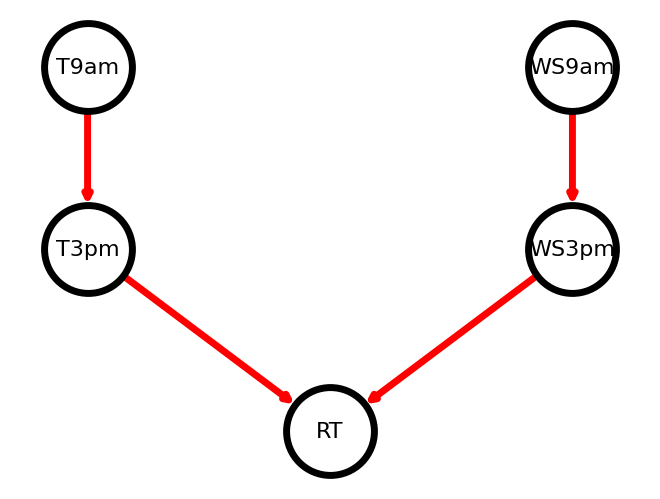

In [80]:

# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2), 3: (1, 0.5), 4:(0,-1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [81]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.64886
1=cat2|0.32668
1=cat3|0.02447
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.39733
0=cat2|0.50787
0=cat3|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.77556
4=Yes|0.22444
----------------


## **Question 2.5:**

We consider a threshold of 0.5.
If probability of raining comes out to be greater than 0.5, our prediction is it will rain tomorrow otherwise not.

### **Evidence 1:**
Time: 9 am, Temperature: 30

In [32]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'T9am', 'cat3', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.05267
1=cat2|0.74013
1=cat3|0.20720
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.00000
0=cat2|0.00000
0=cat3|1.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.85703
4=Yes|0.14297
----------------


Since probability of raining is $0.14297<0.5$, hence our prediction is it will not rain.

### **Evidence 2:**
Time: 9 am, Temperature: 10

In [54]:
# Use above function to add evidence
evidence('ev2', 'T9am', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.97522
1=cat2|0.02476
1=cat3|0.00002
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.73665
4=Yes|0.26335
----------------


Since probability of raining is $0.26335<0.5$, hence our prediction is it will not rain.

### **Evidence 3:**
Time: 3 pm, Temperature: 26

In [69]:
# Use above function to add evidence
evidence('ev3', 'T3pm', 'cat2', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.00000
1=cat2|1.00000
1=cat3|0.00000
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.03012
0=cat2|0.75510
0=cat3|0.21479
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.84743
4=Yes|0.15257
----------------


Since probability of raining is $0.15257<0.5$, hence our prediction is it will not rain.

### **Evidence 4:**
Time: 3 pm, Temperature: 11

In [74]:
# Use above function to add evidence
evidence('ev4', 'T3pm', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.32095
3=cat2|0.67905
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|0.62263
2=cat2|0.37737
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|1.00000
1=cat2|0.00000
1=cat3|0.00000
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.59718
0=cat2|0.39512
0=cat3|0.00770
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.73383
4=Yes|0.26617
----------------


Since probability of raining is $0.26617<0.5$, hence our prediction is it will not rain.

### **Evidence 5:**
Time: 9 am, Windspeed: 11

In [78]:
# Use above function to add evidence
evidence('ev5', 'WS9am', 'cat1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.42703
3=cat2|0.57297
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|1.00000
2=cat2|0.00000
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.64886
1=cat2|0.32668
1=cat3|0.02447
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.39733
0=cat2|0.50787
0=cat3|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.78021
4=Yes|0.21979
----------------


Since probability of raining is $0.21979<0.5$, hence our prediction is it will not rain.

### **Evidence 6:**
Time: 3 pm, Windspeed: 19

In [82]:
# Use above function to add evidence
evidence('ev6', 'WS3pm', 'cat2', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WS3pm|cat1,cat2
Values:
3=cat1|0.00000
3=cat2|1.00000
----------------
Node: 2|WS9am|cat1,cat2
Values:
2=cat1|0.52536
2=cat2|0.47464
----------------
Node: 1|T3pm|cat1,cat2,cat3
Values:
1=cat1|0.64886
1=cat2|0.32668
1=cat3|0.02447
----------------
Node: 0|T9am|cat1,cat2,cat3
Values:
0=cat1|0.39733
0=cat2|0.50787
0=cat3|0.09480
----------------
Node: 4|RT|No,Yes
Values:
4=No|0.76149
4=Yes|0.23851
----------------


Since probability of raining is $0.23851<0.5$, hence our prediction is it will not rain.